In [4]:
# https://github.com/WillKoehrsen/feature-selector/blob/master/Feature%20Selector%20Usage.ipynb
# https://towardsdatascience.com/a-feature-selection-tool-for-machine-learning-in-python-b64dd23710f0

In [1]:
import pandas as pd
import numpy as np

from feature_selector import FeatureSelector
import utils

In [55]:
train_file = '../data/train'
df_train = utils.read_pickles(train_file)


# df_train = pd.read_csv('../data/train.csv')
# target = df_train.pop('target')
# df_train.drop(['ID_code'], axis=1, inplace=True)

100%|██████████| 3/3 [00:02<00:00,  1.07it/s]


In [41]:
df_train = df_train[df_train.columns[1200:]]

In [42]:
df_train.head()

,sq_var_141,r_var_141,n_var_141,mean_var_141,z_var_141,sqrt_var_141,log_var_141,sq_var_142,r_var_142,n_var_142,...,z_mean_var_0,sqrt_mean_var_0,log_mean_var_0,sq_z_var_0,r_z_var_0,n_z_var_0,mean_z_var_0,z_z_var_0,sqrt_z_var_0,log_z_var_0
0,31.372321,22124.5,1.064979e-08,8.498696,-1.265512,2.366664,1.861306,363.336970,176579.5,1.000000,...,0.577102,1.324543,1.285465,0.333046,60863.5,0.281935,0.577102,-0.577102,0.759672,1.167674
1,44.626408,136295.5,1.000000e+00,-3.782704,0.563269,2.584628,2.000259,0.105170,1620.0,0.372855,...,-0.269959,0.905917,1.183883,0.072878,122952.5,0.606404,-0.269959,0.269959,0.519575,1.154923
2,5.972158,47468.5,7.266740e-03,5.341396,-0.795369,1.563266,1.385424,104.362570,78490.0,1.000000,...,0.681113,1.438963,1.329691,0.463915,53545.5,0.247900,0.681113,-0.681113,0.825296,1.173966
3,254.842910,197807.0,1.000000e+00,-13.066204,1.945644,3.995472,2.789568,100.284202,75808.0,1.000000,...,-0.125158,0.616835,1.158479,0.015665,112735.0,0.549801,-0.125158,0.125158,0.353777,1.152075
4,19.329212,30614.0,5.500518e-06,7.294096,-1.086139,2.096783,1.689292,137.262313,98136.5,1.000000,...,0.277303,0.918158,1.185620,0.076897,83041.0,0.390774,0.277303,-0.277303,0.526596,1.155123


In [64]:
fs = FeatureSelector(data = df_train[final_cols[:-1]], labels = target)

In [65]:
fs.identify_single_unique()

0 features with a single unique value.



In [66]:
single_unique = fs.ops['single_unique']
single_unique

[]

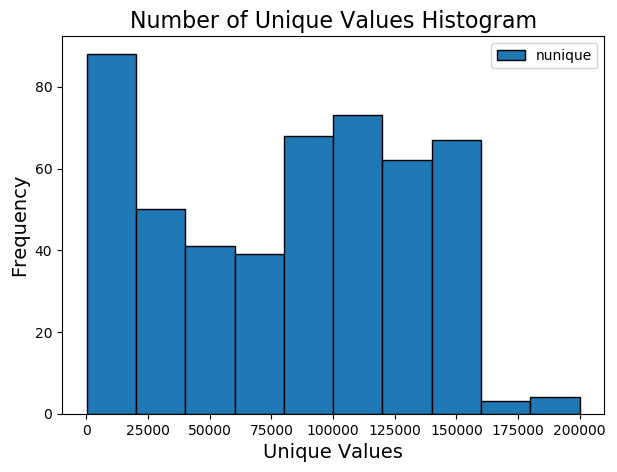

In [67]:
fs.plot_unique()

In [68]:
fs.unique_stats.sample(5)

,nunique
var_77,106809
sq_var_195,33260
var_103,9376
var_162,57396
var_62,74777


In [69]:
fs.identify_collinear(correlation_threshold=0.75)

153 features with a correlation magnitude greater than 0.75.



In [70]:
correlated_features = fs.ops['collinear']
correlated_features[:5]

['mean_var_55', 'sq_var_56', 'sq_var_57', 'sq_var_58', 'r_var_58']

In [71]:
fs.identify_zero_importance(task = 'classification', eval_metric = 'auc', 
                            n_iterations = 3, early_stopping = True)

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[726]	valid_0's binary_logloss: 0.213736	valid_0's auc: 0.890472
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[972]	valid_0's binary_logloss: 0.212899	valid_0's auc: 0.886298
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[827]	valid_0's binary_logloss: 0.208737	valid_0's auc: 0.890828

56 features with zero importance after one-hot encoding.



In [72]:
one_hot_features = fs.one_hot_features
base_features = fs.base_features
print('There are %d original features' % len(base_features))
print('There are %d one-hot features' % len(one_hot_features))

There are 495 original features
There are 0 one-hot features


In [73]:
train_removed = fs.remove(methods = 'all')

['single_unique', 'collinear', 'zero_importance'] methods have been run

Removed 155 features.


In [74]:
# final_cols=[]
# final_cols.extend(list(train_removed.columns))

final_cols=list(train_removed.columns)

In [75]:
len(final_cols)

340

In [56]:
df_train['target'] = target

In [77]:
# final_cols.append('target')
df_train[final_cols+['target']].head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,n_var_183,n_var_184,n_var_186,n_var_187,n_var_191,sq_var_195,sq_var_196,sq_var_199,sq_mean_var_0,target
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,1.000000,1.00000,1.0,0.000000e+00,0.999963,5.749445,62.069187,1.191154,3.077969,0
1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,...,1.000000,1.00000,1.0,0.000000e+00,1.000000,4.136749,66.043253,3.809523,0.673525,0
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,0.999196,1.00000,1.0,1.852202e-10,1.000000,9.870279,42.527354,0.157212,4.287443,0
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,...,1.000000,0.32136,1.0,5.721185e-38,0.999999,1.614424,8.570256,80.992800,0.144769,0
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,...,1.000000,1.00000,1.0,1.000000e+00,1.000000,2.286446,15.418973,77.623148,0.710673,0


In [63]:
# final_cols[:-1]

In [78]:
utils.to_pickles(df_train[final_cols+['target']], '../data/train')

3it [00:01,  1.70it/s]


In [38]:
df_train = utils.read_pickles('../data/train')
df_train['ID_code'] = pd.read_csv('../data/train.csv', usecols=['ID_code'])
utils.to_pickles(df_train[test_cols], '../data/train')

3it [00:01,  1.54it/s]


In [32]:
df_test = utils.read_pickles('../data/test')
df_test['ID_code'] = pd.read_csv('../data/test.csv', usecols=['ID_code'])
utils.to_pickles(df_test[test_cols], '../data/test')

3it [00:03,  1.12it/s]
